In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import kabuki
%matplotlib inline
import hddm
print(hddm.__version__)

# For later convergence check
import multiprocessing as mp

0.8.0


/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


## Two condition HDDM (z : trial_type)
#### Load data and check data head
##### Use anxious.csv

In [2]:
# Load data from csv file into a NumPy structured array
dataAnx = hddm.load_csv('./rt_dataframes/anxious.csv')
dataAnx.head(10)
#check number of rows of data
#data.shape

,subjID,rt,win,trial_type,gain,loss,cert,gamble
0,ff1d7a9a28686c2b,2217.0,1.0,101,16.0,-5.0,0.0,1.0
1,ff1d7a9a28686c2b,1424.0,0.0,101,18.0,-6.0,0.0,1.0
2,ff1d7a9a28686c2b,1805.0,1.0,101,10.0,-5.0,0.0,1.0
3,ff1d7a9a28686c2b,1477.0,1.0,102,14.0,0.0,3.0,1.0
4,ff1d7a9a28686c2b,1257.0,1.0,102,12.0,0.0,4.0,1.0
5,ff1d7a9a28686c2b,1564.0,1.0,101,11.0,-5.0,0.0,1.0
6,ff1d7a9a28686c2b,1421.0,0.0,101,14.0,-4.0,0.0,1.0
7,ff1d7a9a28686c2b,1492.0,0.0,102,14.0,0.0,3.0,1.0
8,ff1d7a9a28686c2b,1196.0,0.0,102,20.0,0.0,7.0,0.0
9,ff1d7a9a28686c2b,1572.0,0.0,101,12.0,-5.0,0.0,1.0


## Prep the data
#### Changed the columns name allow hddm to pick up

In [3]:
dataAnx = dataAnx.rename(columns={'subjID'
: 
'subj_idx',
'gamble':
'response'})
dataAnx['rt'] = dataAnx['rt']/1000
dataAnx.head(10)

,subj_idx,rt,win,trial_type,gain,loss,cert,response
0,ff1d7a9a28686c2b,2.217,1.0,101,16.0,-5.0,0.0,1.0
1,ff1d7a9a28686c2b,1.424,0.0,101,18.0,-6.0,0.0,1.0
2,ff1d7a9a28686c2b,1.805,1.0,101,10.0,-5.0,0.0,1.0
3,ff1d7a9a28686c2b,1.477,1.0,102,14.0,0.0,3.0,1.0
4,ff1d7a9a28686c2b,1.257,1.0,102,12.0,0.0,4.0,1.0
5,ff1d7a9a28686c2b,1.564,1.0,101,11.0,-5.0,0.0,1.0
6,ff1d7a9a28686c2b,1.421,0.0,101,14.0,-4.0,0.0,1.0
7,ff1d7a9a28686c2b,1.492,0.0,102,14.0,0.0,3.0,1.0
8,ff1d7a9a28686c2b,1.196,0.0,102,20.0,0.0,7.0,0.0
9,ff1d7a9a28686c2b,1.572,0.0,101,12.0,-5.0,0.0,1.0


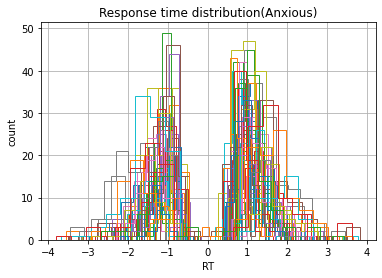

In [4]:
#flip the error RTs to be negative
dataAnx = hddm.utils.flip_errors(dataAnx)
#plt the RTs grouped by participants
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='Response time distribution(Anxious)')
for i, subj_data in dataAnx.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
# plt.savefig('./fitting_results/HDDM/HDDM2C(separate)/rt_distribution(anx).png')

## Fitting the hierarchical model for one condition with no subject effects for Anxious participants

In [5]:
m = hddm.HDDM(dataAnx,depends_on={'z': 'trial_type'}, include=('v', 'a', 'z', 't'))

m.find_starting_values()
m.sample(3000, burn=1000, dbname='./fitting_results/HDDM/HDDM2C(separate)/traces(2CAnx_z)', db='pickle')
m.save('./fitting_results/HDDM/HDDM2C(separate)/model(2CAnx_z)')

/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 3001 of 3000 complete in 1045.3 sec

Plotting a
Plotting a_std
Plotting v
Plotting v_std
Plotting t
Plotting t_std
Plotting z(101)
Plotting z(102)
Plotting z_std


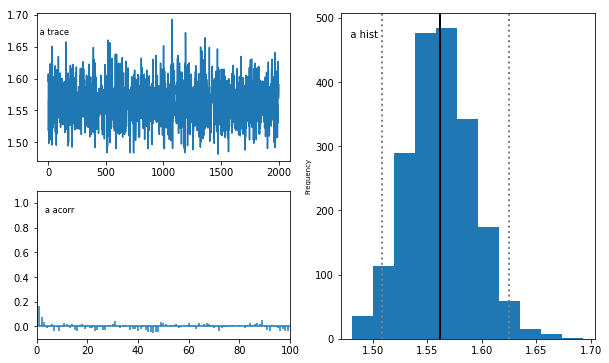

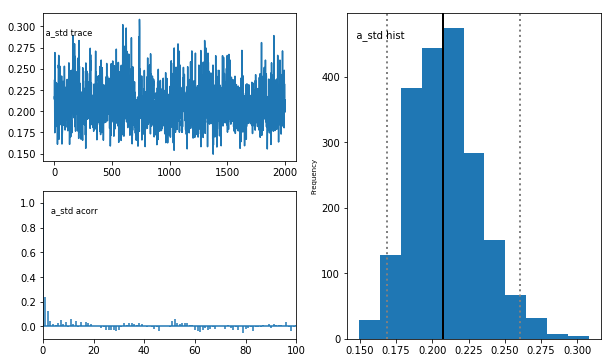

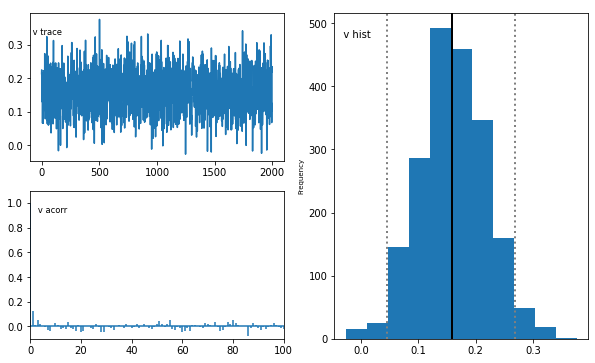

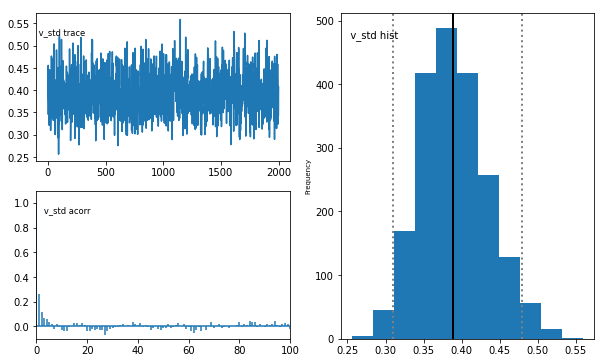

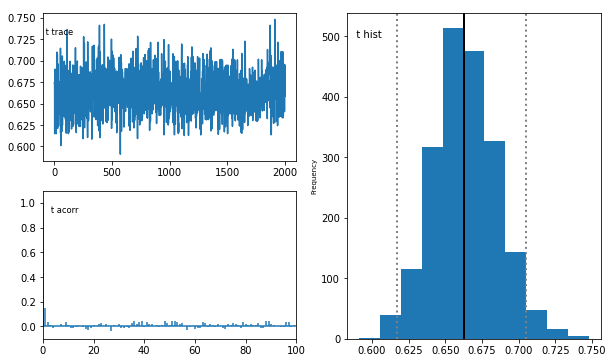

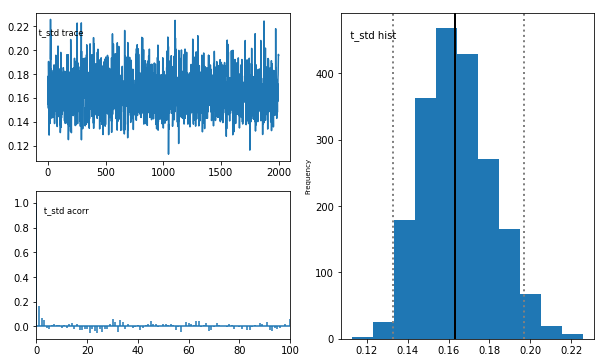

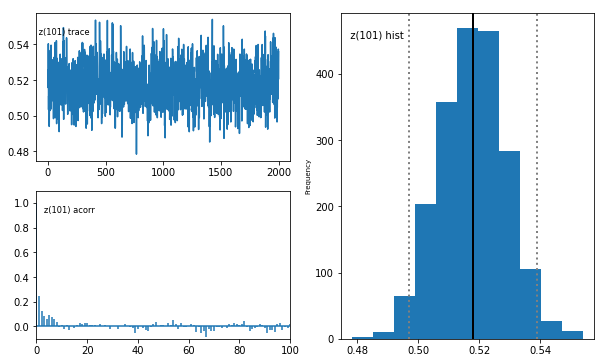

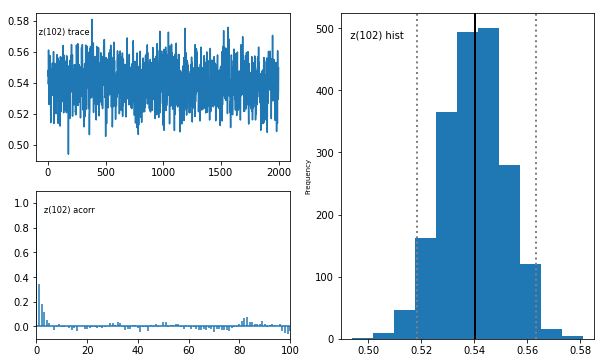

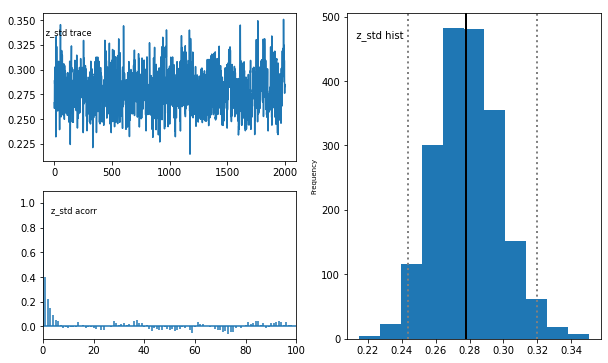

In [6]:
# plot posteriors
m.plot_posteriors(['a', 't', 'v', 'a_std', 'v_std','z', 'z_std','t_std'])

In [7]:
stats2Cz = m.gen_stats()
stats2Cz.to_csv('./fitting_results/HDDM/HDDM2C(separate)/HDDM2CAnx_z.csv', sep=',')
stats2Cz[stats2Cz.index.isin(['a', 'a_std', 'v', 'v_std', 't', 't_std', 'z', 'z_std'])]

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,1.56252,0.0303016,1.50582,1.54208,1.56189,1.58262,1.62395,0.000816463
a_std,0.209053,0.0237076,0.169141,0.191617,0.207576,0.223521,0.262301,0.000742943
v,0.160626,0.0578881,0.0500646,0.122462,0.159257,0.199585,0.273635,0.00159889
v_std,0.390137,0.0438056,0.311862,0.358898,0.388031,0.417978,0.482769,0.0013984
t,0.663825,0.0219871,0.620997,0.648903,0.662783,0.678297,0.709919,0.00061291
t_std,0.16453,0.0170033,0.136124,0.152213,0.163237,0.175513,0.200282,0.000467687
z_std,0.278974,0.0192985,0.24257,0.265726,0.278089,0.291856,0.319216,0.000686321


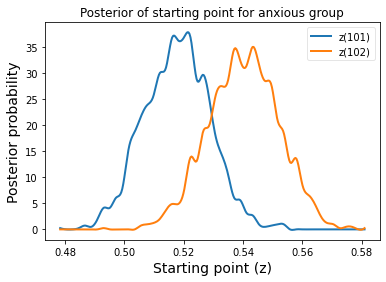

In [8]:
z_101, z_102 = m.nodes_db.node[['z(101)', 'z(102)']]
z_101_trace, z_102_trace = m.nodes_db.node[['z(101)', 'z(102)']]
hddm.analyze.plot_posterior_nodes([z_101, z_102])
plt.xlabel('Starting point (z)', fontsize = 14)
plt.ylabel('Posterior probability', fontsize = 14)
plt.title('Posterior of starting point for anxious group', fontsize = 12)
plt.savefig('./fitting_results/HDDM/HDDM2C(separate)/posterior_zAnx(101,102).png')

In [9]:
m.dic

15327.424984417998

## Check for model convergence

In [10]:
# Set up models list to append results
models2CzAnx = list()

In [11]:
def fit_hddm_chain(data, chain_num):
    print(f'Fitting chain {chain_num}')
    m = hddm.HDDM(data,include=('v', 'a', 'z', 't'))
    m.find_starting_values()
    m.sample(3000, burn=1000, dbname = f'./fitting_results/HDDM/HDDM2C(separate)/chain2Cz_{chain_num}', db='pickle')
    m.save(f'./fitting_results/HDDM/HDDM2C(separate)/chain2CzANX_{chain_num}')
    print(f'Finished chain {chain_num}')
    return m

In [12]:
num_chains = 5
data_chains = [(dataAnx,chain_num) for chain_num in range(num_chains)]

with mp.Pool(processes=num_chains) as pool:
    models2CzAnx = pool.starmap(fit_hddm_chain, data_chains)
print('Finished all chains')

Fitting chain 0Fitting chain 1

Fitting chain 2
Fitting chain 3Fitting chain 4



/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 -----------------94%---------------   ] 2840 of 3000 complete in 862.6 sec               0%                  ] 3 of 3000 complete in 0.9 sec[                  0%                  ] 3 of 3000 complete in 1.1 sec[                  0%                  ] 4 of 3000 complete in 1.5 sec[                  0%                  ] 3 of 3000 complete in 1.0 sec[                  0%                  ] 3 of 3000 complete in 1.0 sec[                  0%                  ] 3 of 3000 complete in 1.0 sec[                  0%                  ] 5 of 3000 complete in 2.1 sec  [                  0%                  ] 4 of 3000 complete in 1.6 sec[                  0%                  ] 4 of 3000 complete in 1.6 sec[                  0%                  ] 4 of 3000 complete in 1.7 sec[                  0%                  ] 5 of 3000 complete in 2.1 sec[                  0%                  ] 6 of 3000 complete in 2.4 sec[                  0%                  ] 7 of 3000 complete in 3.1 sec[                

In [13]:
models2CzAnx

In [14]:
results = hddm.analyze.gelman_rubin(models2CzAnx)
for key, value in results.items():
    print(f"{key}: {value}")

a: 1.0006487547861567
a_std: 1.001363025075926
a_subj.00aa64fdcb675341: 1.0005961461797237
a_subj.06c46b112368babf: 1.000831541006263
a_subj.0beac20378edac7b: 1.0002141460523195
a_subj.10d15198ac61a404: 1.000420528731709
a_subj.12a096342c4d052f: 1.0009001400002526
a_subj.13e347e32a454872: 1.0008125966628107
a_subj.1ffdcfc59b83c43a: 0.9998097466435919
a_subj.221e9f16c114b2c0: 1.0004471626115226
a_subj.2737c4b829b3018f: 1.000895174199628
a_subj.279cd1540fc8f71f: 1.0000617344952012
a_subj.2a531595d6ab08c8: 1.000047798867959
a_subj.2adc46a1bfc70679: 1.0002896345955403
a_subj.322d6276c00056e7: 1.0000880161038628
a_subj.46099f8b742520b0: 1.0005219182767653
a_subj.49c4e664cf02d362: 1.0004785118690014
a_subj.4a6bf10e80304920: 1.0003232401730686
a_subj.4dee88b397c3bbf4: 1.0001969827492554
a_subj.52abc657a668b04e: 1.0002325009749944
a_subj.5696a26f6b865ccb: 1.0000600777831796
a_subj.61dce9b56e969395: 1.000806436795169
a_subj.6246f3d78ae6b481: 1.0000201421254988
a_subj.6ac61d4f76c3add5: 1.0002616

In [15]:
bigger_than_threshold = {}
smaller_than_threshold = {}
for key, value in results.items():
    if value > 1.1:
        bigger_than_threshold[key] = value
    elif value < 0.9:
        smaller_than_threshold[key] = value
print("Values bigger than the threshold:")
print(bigger_than_threshold)

print("\nValues smaller than the threshold:")
print(smaller_than_threshold)

Values bigger than the threshold:
{}

Values smaller than the threshold:
{}


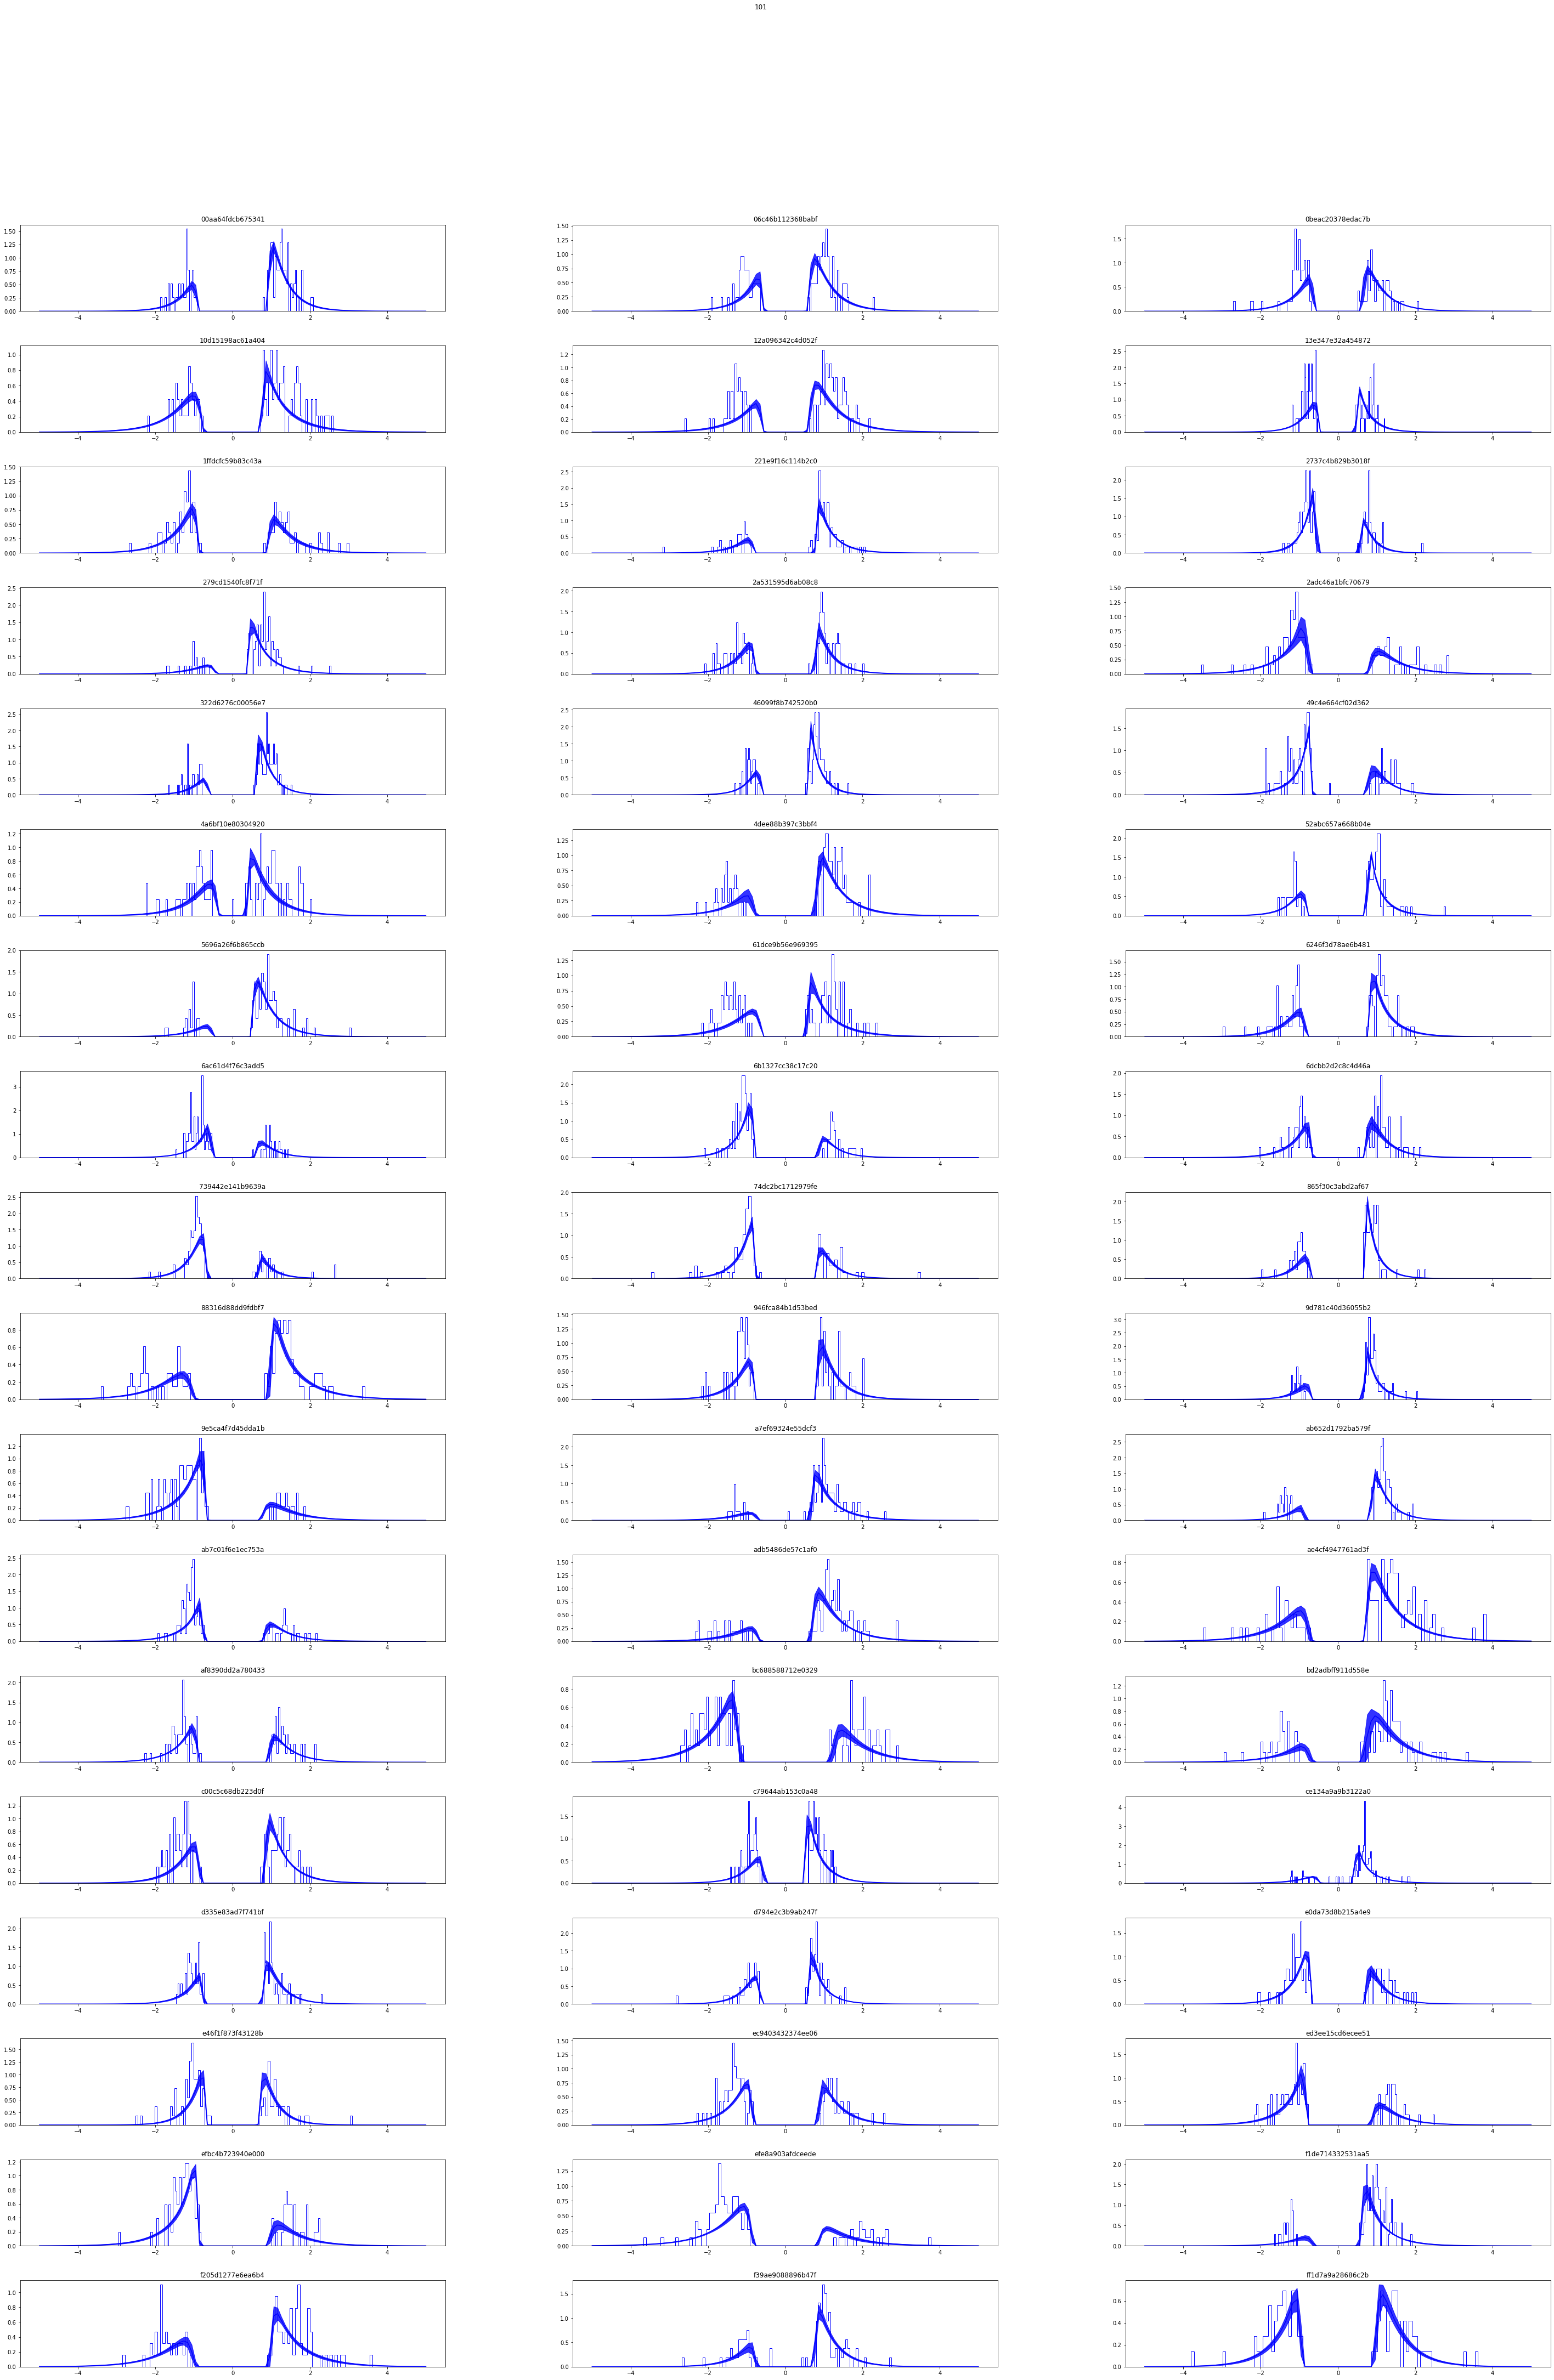

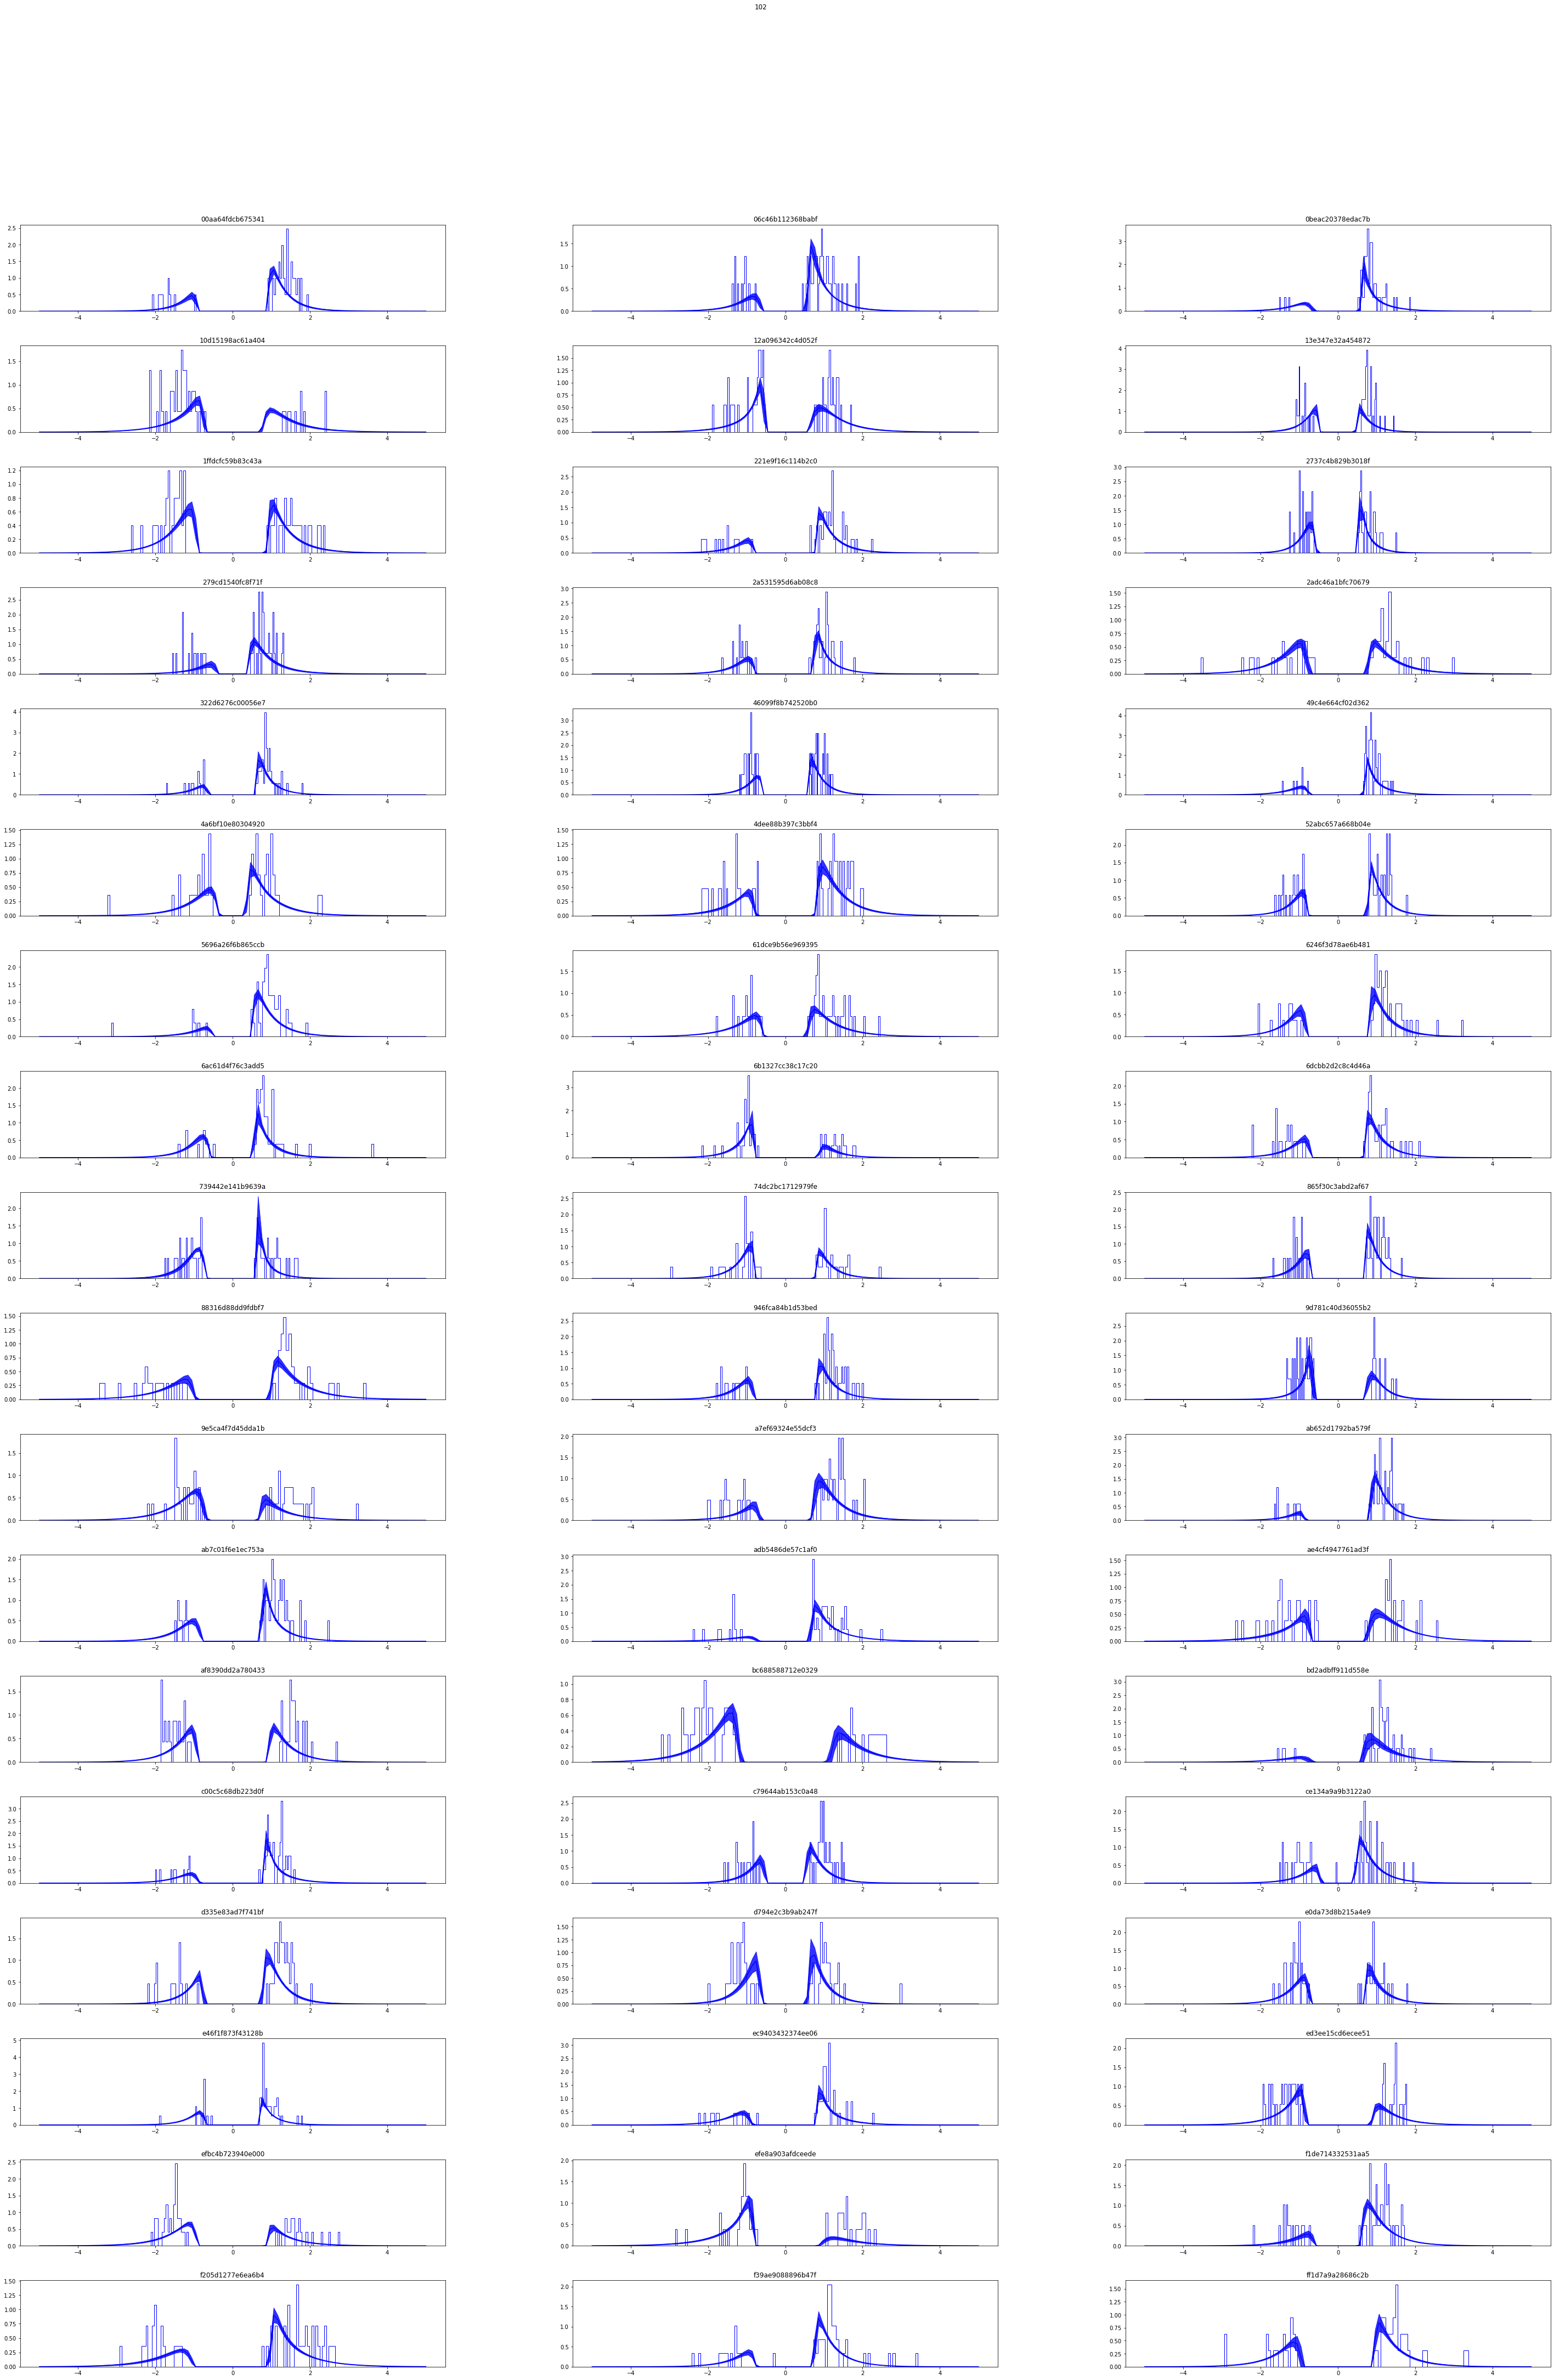

In [16]:
m.plot_posterior_predictive(figsize=(50, 70))